In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
experiment_name = 'mnist'
# experiment_name = 'cifar10'

# mnist, SEED=1233 by default
# cifar10, SEED=1234 by default
SEED = 1233
CANONICAL_NUM = {'mnist':4, 'cifar10':3}
INTERPOLATE = False
ROUNDS = [0, 20, 50, 200]
N_TASKS = {'mnist':100, 'cifar10':80}

PATH = f'../logs/{experiment_name}/Fedpop_{CANONICAL_NUM[experiment_name]}'
if INTERPOLATE:
    PATH += '_interpolate'    
PATH += f'_{SEED}'

In [12]:
plt.style.use('seaborn-paper')
import matplotlib
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['figure.figsize'] = [6.4, 4]

In [13]:
import os 
import pickle 

def rearrgement_matrix(path):
    matrix = np.load(path)

    with open(os.path.join(PATH, 'task_id_map.pkl'), 'rb') as f:
        task_to_client = pickle.load(f)

    matrix = matrix[[task_to_client[task_id] for task_id in range(N_TASKS[experiment_name])]]

    with open(f'../data/{experiment_name}/client_index.pkl', 'rb') as f:
        data_to_task = pickle.load(f)
    matrix = matrix[[data_to_task[data_id] for data_id in range(N_TASKS[experiment_name])]]
    return matrix

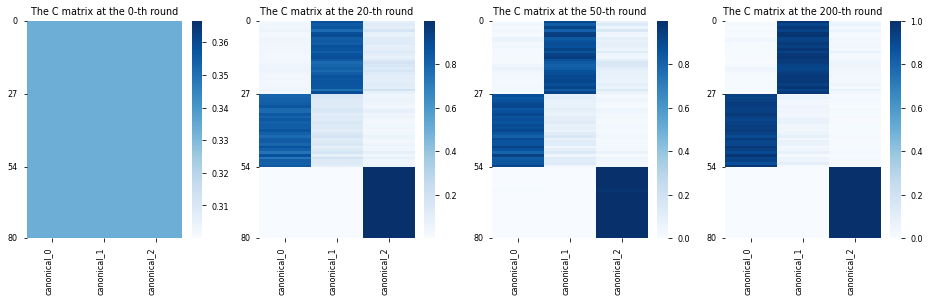

In [14]:
import seaborn as sns


if experiment_name == 'mnist':
    y_ticks = [0, 25, 50, 75, 100]
else:
    y_ticks = [0, 27, 54, 80]


fig, axes = plt.subplots(nrows=1, ncols=len(ROUNDS), figsize=(16, 4))

for i, t in enumerate(ROUNDS):
    matrix = rearrgement_matrix(os.path.join(PATH, f'round_{t}.npy'))
    # if i != len(ROUNDS) - 1:
    #     sns.heatmap(data=matrix, cmap='Blues', xticklabels=[f'canonical_{i}' for i in range(3)], ax=axes[i], cbar=True)
    # else:
    if experiment_name == "mnist":
        sns.heatmap(data=matrix, cmap='Blues', xticklabels=[f'canonical_{i}' for i in range(4)], ax=axes[i])
    else:
        sns.heatmap(data=matrix, cmap='Blues', xticklabels=[f'canonical_{i}' for i in range(3)], ax=axes[i])
    axes[i].set_title(rf'The C matrix at the {t}-th round')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right')
    axes[i].set_yticks(y_ticks)
    axes[i].set_yticklabels(y_ticks)


plt.savefig(f'cmatrix_{experiment_name}.pdf', dpi=1200, bbox_inches='tight')